<a href="https://colab.research.google.com/github/Plumz17/PCD_FinalProject/blob/main/PCD_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Digital Image Processing Final Project - Group 5
* Anders Emmanuel Tan (24/541351/PA/22964) KOMB
* Evan Razzan Adytaputra (24/545257/PA/23166) KOMB
* Indratanaya Budiman (24/534784/PA/22683) KOMA
* Daffa Maulana Siddiq (24/533358/PA/22569) KOMA


## 1. Setting Up Image to be Processed


In [19]:
#Cloning Github Repository to get the Image
!rm -rf PCD_FinalProject
!git clone https://github.com/Plumz17/PCD_FinalProject

Cloning into 'PCD_FinalProject'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 239.08 KiB | 3.03 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [20]:
# Import Important Libraries
import cv2 # For Reading Image
import numpy as np # For Manipulating Image Matrix
import matplotlib.pyplot as plt # For Showing Image
import math # For Math

filename_normal = "/content/PCD_FinalProject/normal.png"
filename_tbc = "/content/PCD_FinalProject/tbc.png"

img_normal = cv2.imread(filename_normal) # Read Image
img_normal = cv2.cvtColor(img_normal, cv2.COLOR_BGR2GRAY) # Change the color map

img_tbc = cv2.imread(filename_tbc) # Read Image
img_tbc = cv2.cvtColor(img_tbc, cv2.COLOR_BGR2GRAY) # Change the color map


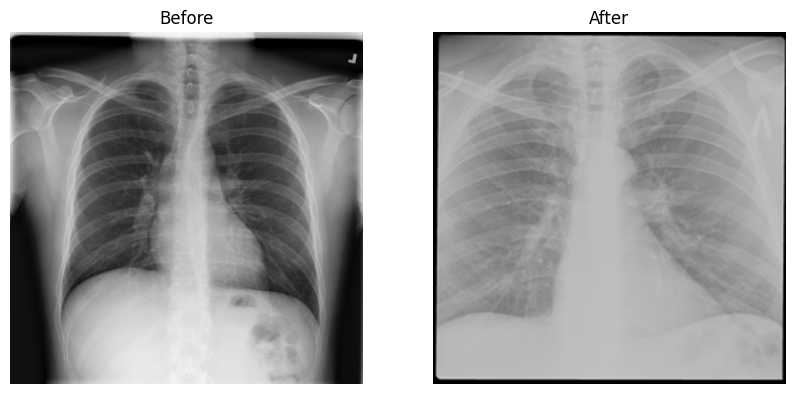

In [21]:
def show(before, after, title1="Before", title2="After"): # Helper function to check the before and after of the enhancement
  plt.figure(figsize=(10,5))

   # Show original
  plt.subplot(1,2,1)
  plt.imshow(before, cmap='gray', vmin=0, vmax=255) #vmin and max to preserve original image's contrast
  plt.title(title1)
  plt.axis("off")

  # Show processed
  plt.subplot(1,2,2)
  plt.imshow(after, cmap='gray', vmin=0, vmax=255)
  plt.title(title2)
  plt.axis("off")

  plt.show()

show(img_normal, img_tbc)

In [22]:
def hist(img):
  L = 256
  #Make Histograms
  hist = np.zeros(L)
  for i in range(img.shape[0]):#Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(img.shape[1]): #Iterate for every pixel in the y axis
      hist[int(img[i,j])] += 1 # Add that pixel to the histogram

  pdf = hist / (img.shape[0] * img.shape[1]) # Calculate the probablity distribution function (From Probability and Stotastic Process Subject)
  cdf = np.zeros(L)
  cdf[0] = pdf[0]
  for i in range(1, L): # Calculate the cumulative distribution function
    cdf[i] = cdf[i - 1] + pdf[i]

  cdf = (cdf * (L - 1)).astype(np.uint8) # Calculate the pixel value using cdf so it's between 0 and 255

  out = np.zeros(img.shape, dtype=np.uint8)
  for i in range(out.shape[0]):#Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(out.shape[1]): #Iterate for every pixel in the y axis
      out[i,j] = cdf[img[i,j]]
  return out

img_tbc_hist = hist(img_tbc)
img_normal_hist = hist(img_normal)

In [23]:
def find_otsu_threshold(image):
  hist, bins = np.histogram(image.flatten(), 256, [0, 256]) #Make the PDF of the histogram
  totalPixel = image.size
  normilizedProb = hist / totalPixel # Normalize the histogram for easier calculation
  intensityLevels = np.arange(256)
  #Define used variables to minimize WCI
  minVariance = float("inf")
  optimalTreshold = 0

  #Loop over every single Threshold from 0 to 255
  for T in range(256):
    #Calculate Weight, Mean, and Variance of background
    wb = np.sum(normilizedProb[:T + 1])
    if wb == 0:
      continue
    meanb_up = np.sum(intensityLevels[:T + 1] * normilizedProb[:T + 1])
    meanb = meanb_up / wb
    varianceb_up = np.sum(normilizedProb[:T + 1] * (intensityLevels[:T + 1] - meanb)**2)
    varianceb = varianceb_up / wb

    #Calculate Weight, Mean, and Variance of foreground
    wf = np.sum(normilizedProb[T + 1:])
    if wf == 0:
      break

    meanf_up = np.sum(intensityLevels[T + 1:] * normilizedProb[T + 1:])
    meanf = meanf_up / wf
    variancef_up = np.sum(normilizedProb[T + 1:] * (intensityLevels[T + 1:] - meanf)**2)
    variancef = variancef_up / wf

    #Use Otsu Method Formula
    within_class_variance = wb * varianceb + wf * variancef

    #Override Threshold if more otpimal
    if within_class_variance < minVariance:
      minVariance = within_class_variance
      optimalTreshold = T
  return optimalTreshold

def segment(image, threshold = 128):
  segmented_image = np.zeros(image.shape, dtype = np.uint8)
  row, col = image.shape

  for r in range(row):
    for c in range(col):
      if image[r,c] > threshold:
        segmented_image[r,c] = 255
      else:
        segmented_image[r,c] = 0

  return segmented_image

img_tbc_hist = segment(img_tbc_hist, find_otsu_threshold(img_tbc_hist))
img_normal_hist = segment(img_normal_hist, find_otsu_threshold(img_normal_hist))

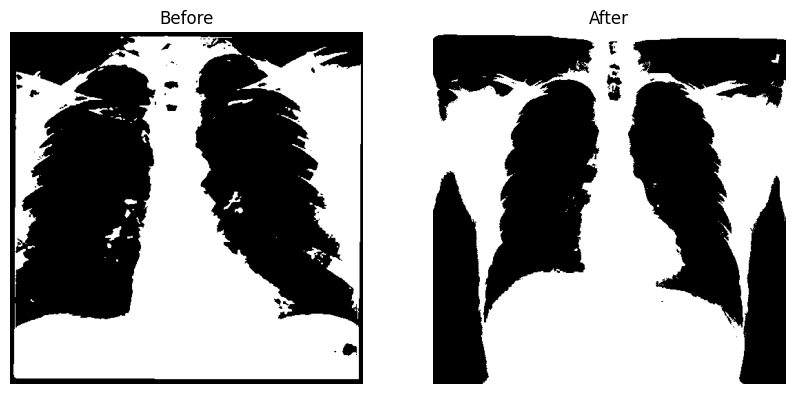

In [24]:
show(img_tbc_hist, img_normal_hist)